In [4]:
import pandas as pd
from datetime import datetime
###FILTRAR DATOS
##Filtro f1: elimina datos de valores no esperados.

#Creamos df_f1, para los datos con Filtro : f0 + f1 +f2
df_f11 = pd.read_csv('df_f0+f2.csv',index_col='Time')
## generamos indice en formato TIME

df_f1 = df_f11 
#df_f1.index = pd.to_datetime(df_f1.index)

date_index = [datetime.strptime(date_str, '%H:%M %d/%m/%Y') for date_str in df_f1.index ]
df_f1.index = date_index

###Se aplica los filtros por columna:
#se ingresan los valores de referencia.
#se completa con "nan numerico" los valores fuera del intervalo:

#t_out: 
t_min_ref=5.0  # ref_armada: 7.3  #ref_datos: 4.8   
t_max_ref=30.0 #ref_armada: 25.9  #ref_datos: 31.3

df_f1.t_out[(df_f1.t_out<t_min_ref)]=float("nan") 
df_f1.t_out[(df_f1.t_out>t_max_ref)]=float("nan")

#rh_out:
rh_min_ref=0   #ref_armada: 34  #ref_datos:11
rh_max_ref=100 #ref_armada: 99  #ref_datos:100

df_f1.rh_out[(df_f1.rh_out<rh_min_ref)]=float("nan") 
df_f1.rh_out[(df_f1.rh_out>rh_max_ref)]=float("nan")

#wind:(m/s)
wind_min_ref=0   #ref_armada: 0  #ref_datos:0
wind_max_ref=25  ##ref_armada: 23  #ref_datos: 21

df_f1.wind[(df_f1.wind<wind_min_ref)]=float("nan") 
df_f1.wind[(df_f1.wind>wind_max_ref)]=float("nan")

#td:
td_min_ref=0   ##ref_armada: 0.8  #ref_datos:0.0
td_max_ref=19  #ref_armada: 18.8  #ref_datos:18.4

df_f1.td[(df_f1.td<td_min_ref)]=float("nan") 
df_f1.td[(df_f1.td>td_max_ref)]=float("nan")


#p_abs:
pabs_min_ref=990  #ref_armada: sin info  #ref_datos:995.5
pabs_max_ref=1100  #ref_armada: sin info  #ref_datos:1026.5

df_f1.p_abs[(df_f1.p_abs<pabs_min_ref)]=float("nan") 
df_f1.p_abs[(df_f1.p_abs>pabs_max_ref)]=float("nan")

#p_rel
prel_min_ref=990  #ref_armada: 1008   #ref_datos:995.6
prel_max_ref=1100 #ref_armada: 1029.9 #ref_datos:1026

df_f1.p_rel[(df_f1.p_rel<prel_min_ref)]=float("nan") 
df_f1.p_rel[(df_f1.p_rel>prel_max_ref)]=float("nan")

#df_f1.p_abs.plot(color='b')
#df_f1.p_rel.plot(color='r')
#pl.show()
#rain
rain_min_ref=0  #sin ref   #ref_armada: sin info  #ref_datos:0
rain_max_ref=20 #sin ref   #ref_armada: sin info  #ref_datos:19.8

df_f1.rain_rate[(df_f1.rain_rate<rain_min_ref)]=float("nan") 
df_f1.rain_rate[(df_f1.rain_rate>rain_max_ref)]=float("nan")

#df_f1.to_csv('meteo-2017-21019_completo_formato.csv') 
#df_f1.to_pickle('meteo-2017-2019_completo_formato.pkl')

In [5]:
print(df_f1.columns)
print(df_f11.index)


Index(['t_out', 'rh_out', 'wind', 'td', 'wind_dir', 'p_abs', 'p_rel',
       'rain_rate'],
      dtype='object')
DatetimeIndex(['2017-10-03 05:30:00', '2017-10-03 05:40:00',
               '2017-10-03 05:50:00', '2017-10-03 06:00:00',
               '2017-10-03 06:10:00', '2017-10-03 18:19:00',
               '2017-10-03 19:29:00', '2017-10-03 19:39:00',
               '2017-10-03 19:49:00', '2017-10-03 19:59:00',
               ...
               '2019-07-29 19:04:00', '2019-07-29 19:14:00',
               '2019-07-29 19:24:00', '2019-07-29 19:34:00',
               '2019-07-29 19:44:00', '2019-07-29 20:24:00',
               '2019-07-29 20:34:00', '2019-07-29 20:44:00',
               '2019-07-29 20:47:00', '2019-07-29 20:48:00'],
              dtype='datetime64[ns]', length=95314, freq=None)


In [7]:
### script par agrupar por hora exactas a partir
import pandas as pd
from datetime import datetime

#df_f1 = pd.read_csv('meteo-2017-21019_completo_formato.csv',index_col='Time')

#date_index = [datetime.strptime(date_str, '%H:%M %d/%m/%Y') for date_str in df_f1.index ]
#df_f1.index = date_index

df = df_f1

df_por_h = df.loc[(df.index.minute >= 50) | (df.index.minute <= 10)]

#print(df_por_h['t_out'].head(10))

df_por_h.index = df_por_h.index.round('H')

df_por_h = df_por_h[~df_por_h.index.duplicated()]

print(df_por_h['t_out'])

df_por_h.to_csv('meteo-2017-21019_por-hora_formato.csv') 
#df_por_h.to_pickle('meteo-2017-21019_por-hora_formato.pkl')

2017-10-03 06:00:00    19.7
2017-10-03 20:00:00    19.8
2017-10-03 21:00:00    18.6
2017-10-03 22:00:00    18.9
2017-10-03 23:00:00    15.1
                       ... 
2019-07-29 13:00:00    12.1
2019-07-29 15:00:00    15.9
2019-07-29 16:00:00    15.5
2019-07-29 18:00:00    19.1
2019-07-29 19:00:00    19.1
Name: t_out, Length: 15886, dtype: float64


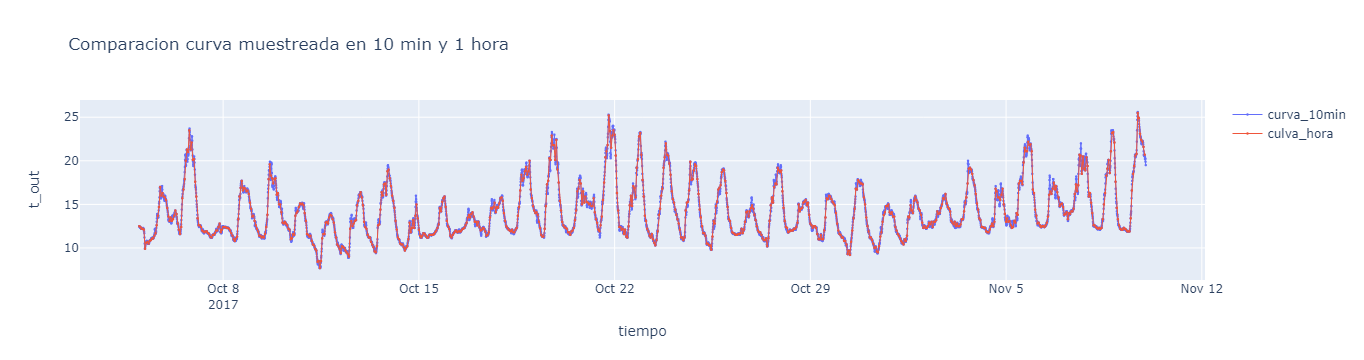

In [7]:
## Comparacion grafica de los datos originales con ls datos agrupados en frecuencia de Hora
## se utiliza la libreria plotly graph-objs, de bajo nivel, que permite customizar las figuras.

import plotly.graph_objs as go

## Para probar el script creamos una particion de los dataframe originales..
d0 = '2017-10-05'
d1 = '2017-11-9'
colum = 't_out'

df_10m = df.loc[d0:d1]
df_1h = df_por_h.loc[d0:d1]
## creamos la figura
fig = go.Figure()

## agragamos la primera curva, a partir del dataframe (df) que contiene todos los datos.

fig.add_trace(go.Scatter(x = df_10m.index, y = df_10m[colum], 
                         name= 'curva_10min', 
                         mode='lines+markers',
                         line=dict(width=1),
                         marker=dict(size=2.5)))

## agregamos la segunda curva, a partir del dataframe agrupado por hora (de_por_h):

fig.add_trace(go.Scatter(x = df_1h.index, y = df_1h[colum], 
                         name= 'culva_hora',
                         mode='lines+markers',
                         line=dict(width=1),
                         marker=dict(size=2.5)))

## agregamos informacion al grafico
fig.update_layout( title='Comparacion curva muestreada en 10 min y 1 hora',
                 xaxis_title = 'tiempo',
                  yaxis_title = colum,
                 template = 'plotly')

fig.show()



In [11]:
import numpy as np
arr_t = df_1h[colum].values
print (arr_t)
np.save('arr_t.npy', arr_t)

[12.5 12.4 12.2 12.2 12.1  9.9 10.6 10.7 10.5 10.8 10.9 11.1 11.1 11.4
 11.7 12.6 13.7 14.7 17.  16.  16.3 15.9 15.8 15.5 14.6 13.6 13.1 13.5
 13.1 13.3 13.7 14.3 13.9 12.8 12.1 11.6 12.4 15.7 16.7 17.9 20.  21.3
 21.  23.5 21.3 22.1 20.1 20.2 17.6 15.9 13.4 12.6 12.6 12.4 12.  11.9
 11.8 11.9 11.9 11.7 11.6 11.3 11.2 11.5 11.5 11.7 12.  12.  12.4 12.8
 11.8 12.1 12.4 12.4 12.4 12.3 12.3 12.2 12.  11.7 11.4 11.  10.8 11.1
 11.3 13.3 15.9 16.9 17.7 16.6 16.9 16.8 16.5 16.6 16.2 15.2 14.5 13.6
 13.7 13.1 12.6 12.2 11.9 11.4 11.4 11.2 11.3 11.2 11.6 12.4 13.8 17.9
 19.6 18.3 18.  17.4 17.9 18.  16.1 16.3 15.  15.  14.1 12.9 12.8 13.
 12.8 12.6 12.2 12.1 11.  11.1 11.6 11.5 13.7 14.  14.2 14.7 15.1 15.
 15.1 14.9 14.  13.1 11.6 11.5 11.3 11.4 10.8 10.4 10.3  9.9  9.7  8.4
  8.5  7.7  8.5 11.1 11.6 11.6 12.9 13.  12.8 13.5 13.8 13.7 13.3 12.9
 11.8 11.2 10.4 10.2  9.9  9.4 10.2 10.1 10.   9.7  9.5  9.3  9.  12.2
 13.1 12.5 12.8 13.1 13.2 14.9 15.4 16.1 16.4 15.8 14.9 13.  12.4 12.2
 11.5 11

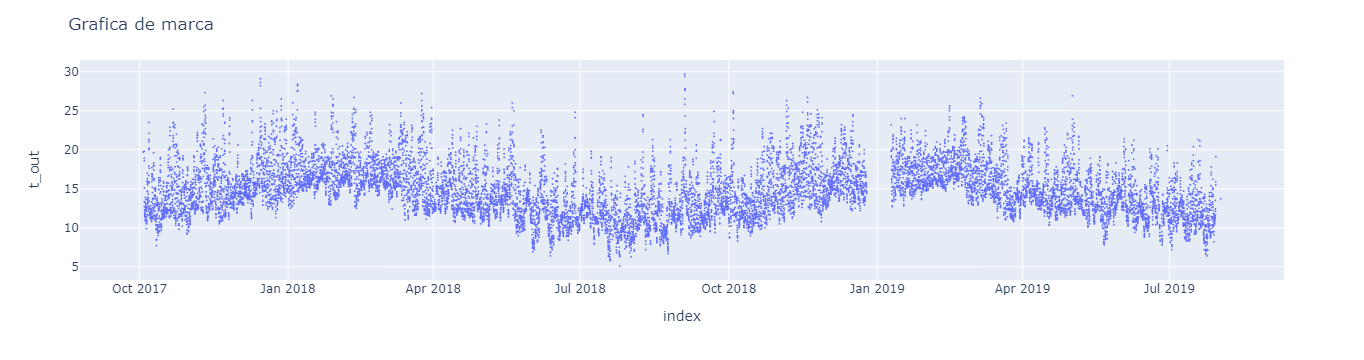

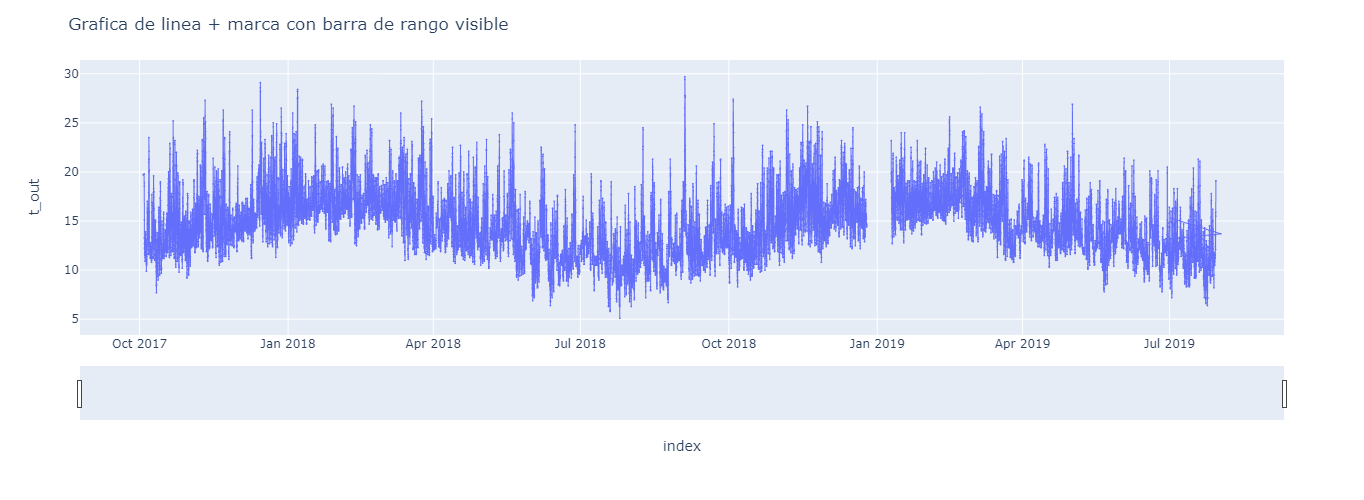

In [21]:
###GRAFICA DE datos, utilizando plotly: 
#Metodo 1 con la libreria plotly express, de alto nivel con funciones prediseñadas.
## Referencia:   https://plotly.com/python/plotly-express/


import plotly.express as px
import plotly.io as pio

pio.renderers.default = "jupyterlab"

# figura 1, grafica interactiva de todos los datos de la columna t_out, en una frecuencia de hora.
fig1 = px.line(df_por_h, x = df_por_h.index, y = df_por_h['t_out'])
fig1.update_traces(mode='markers+text', 
                   marker_size=2)
fig1.update_layout(title = 'Grafica de marca')

# figura 2, se agrega una barra para filtrar la visualizacion de datos.
fig2 = px.line(df_por_h, x = df_por_h.index, y = df_por_h['t_out'])
fig2.update_traces(mode='text+lines+markers',
                   line=dict(width=1),
                   marker=dict(size=2))
fig2.update_layout(height=500, 
                   xaxis_rangeslider_visible=True, 
                   title= 'Grafica de linea + marca con barra de rango visible'
                  template=)

# se muestran ambas figuras.
fig1.show()
fig2.show()


In [38]:
### script para la grafica de variables en un rango de tiempo de 5 dias.

import plotly.express as px
import plotly.io as pio
import pandas as pd

## creamos un dataframe con los datos de un intervalo de tiempo fijo, (5 dias)
d0 = '2017-10-05'
d1 = '2017-10-05'

df_5d = df.loc[d0:d1]
df_t5d = df_5d['t_out']

print(df_5d.shape)
print(df_t5d)

df_t5d.to_csv('df_t5d_test.csv') 

pio.renderers.default = "jupyterlab"

"""
## creamos la figura para mostrar dos columnas del dataframe
fig1 = px.line(df_5d, x = df_5d.index, y =['t_out','td'])
fig1.update_traces(mode='markers+text', marker_size=2)
fig1.update_layout(title = 'Grafica de 5 dias de dos columnas con punto')


fig2 = px.line(df_5d, x = df_5d.index, y =['t_out','td'], color_discrete_sequence=px.colors.qualitative.Dark2)
fig2.update_traces(mode='text+lines+markers',line=dict(width=0.3), marker=dict(size=3))
fig2.update_layout(title = 'Grafica de 5 dias de dos columnas con linea y punto')


fig1.show()
fig2.show()
"""

(145, 8)
2017-10-05 00:00:00    12.5
2017-10-05 00:10:00    12.5
2017-10-05 00:20:00    12.4
2017-10-05 00:30:00    12.4
2017-10-05 00:40:00    12.4
                       ... 
2017-10-05 23:19:00    15.3
2017-10-05 23:29:00    15.1
2017-10-05 23:39:00    14.9
2017-10-05 23:49:00    14.7
2017-10-05 23:59:00    14.6
Name: t_out, Length: 145, dtype: float64


"\n## creamos la figura para mostrar dos columnas del dataframe\nfig1 = px.line(df_5d, x = df_5d.index, y =['t_out','td'])\nfig1.update_traces(mode='markers+text', marker_size=2)\nfig1.update_layout(title = 'Grafica de 5 dias de dos columnas con punto')\n\n\nfig2 = px.line(df_5d, x = df_5d.index, y =['t_out','td'], color_discrete_sequence=px.colors.qualitative.Dark2)\nfig2.update_traces(mode='text+lines+markers',line=dict(width=0.3), marker=dict(size=3))\nfig2.update_layout(title = 'Grafica de 5 dias de dos columnas con linea y punto')\n\n\nfig1.show()\nfig2.show()\n"